# Regresi dengan Regularisasi

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import kstest, norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

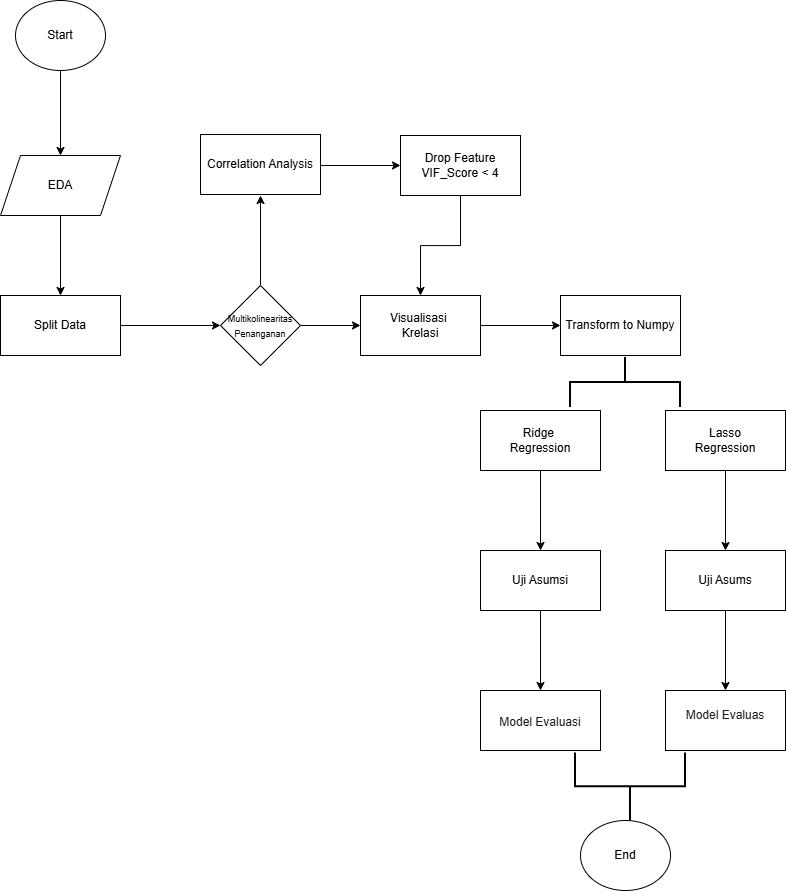

## Basic Training
Ridge Regression, Lasso

### Load Data

In [ ]:
import os

from google.colab import drive
drive.mount('/content/gdrive')
admission = pd.read_csv("/content/gdrive/My Drive/MRA-12/Tugas MRA.csv")
admission.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   Age                   1000 non-null   int64  
 3   Driving_License       1000 non-null   int64  
 4   Region_Code           1000 non-null   float64
 5   Previously_Insured    1000 non-null   int64  
 6   Vehicle_Age           1000 non-null   object 
 7   Vehicle_Damage        1000 non-null   object 
 8   Annual_Premium        1000 non-null   float64
 9   Policy_Sales_Channel  1000 non-null   float64
 10  Vintage               1000 non-null   int64  
 11  Response              1000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory us

In [ ]:
admission.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1


terdapat 12 variabel dengan foloat 3, int 6, dan object 3

In [ ]:
le = LabelEncoder()
for col in admission.select_dtypes(include='object').columns:
    admission[col] = le.fit_transform(admission[col].astype(str))
    print("\nTipe data setelah konversi:\n", admission.dtypes)
print("\n5 data teratas setelah konversi:\n", admission.head())


Tipe data setelah konversi:
 id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Tipe data setelah konversi:
 id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Tipe data setelah konversi:
 id                        int64
Gender                    int64
Age                       int64
Driving_License   

### Split Data

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = admission.drop(columns=['id','Response'])
target = admission[['Response']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=15)

dilakukan split data Menandakan bahwa bagian kode ini digunakan untuk memisahkan data menjadi data latih (train) dan data uji (test).

### Multicollinearity Handling

In [ ]:
# calculate vif score for each column in feature_admit_train
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Gender,1.045224
2,Age,1.685374
3,Driving_License,1.018083
4,Region_Code,1.011063
5,Previously_Insured,3.148082
6,Vehicle_Age,1.351891
7,Vehicle_Damage,3.120657
8,Annual_Premium,1.067845
9,Policy_Sales_Channel,1.423472
10,Vintage,1.010162


In [ ]:
Untuk mendeteksi multikolinearitas antar variabel bebas (independent variables) dalam data pelatihan feature_admit_train menggunakan VIF (Variance Inflation Factor).

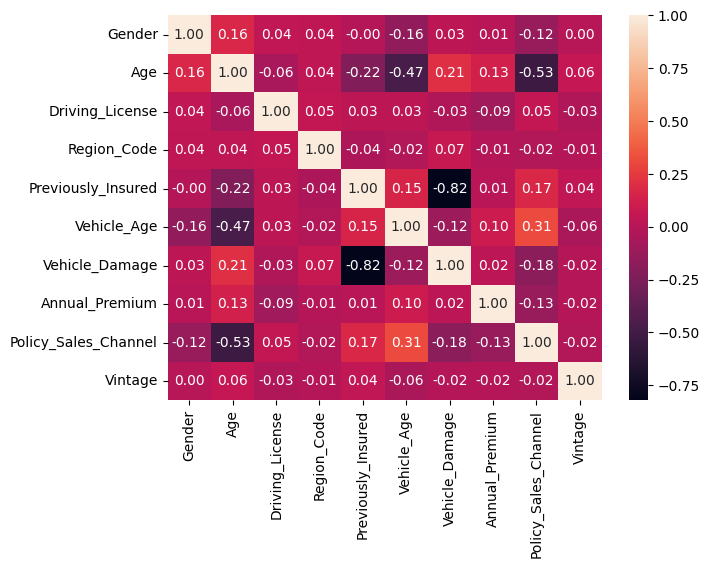

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Transform to Numpy

In [ ]:
# transform ke numpy array
# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy().ravel()

proses ini digunakan untuk mengubah tipe data dari DataFrame (pandas) menjadi array (NumPy).

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# define the model
ridge_reg = Ridge(alpha=10,
                  random_state=15)

# train model
ridge_reg.fit(X_admit_train, y_admit_train)

Ridge(alpha=10, random_state=15)

untuk meminimalkan error training (Residual Sum of Squares) dan menjaga koefisien tetap kecil agar model lebih stabil dan generalisasi lebih baik

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = ridge_reg
print(model)
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

Ridge(alpha=10, random_state=15)


,feature,coefficient
0,intercept,1.607678e-01
1,Gender,3.640478e-02
2,Age,-3.344529e-04
3,Driving_License,2.823685e-02
4,Region_Code,-1.181666e-03
5,Previously_Insured,-7.223920e-02
6,Vehicle_Age,-1.756571e-02
7,Vehicle_Damage,1.597484e-01
8,Annual_Premium,5.096380e-07
9,Policy_Sales_Channel,-7.426152e-04


y = 1,6 + 3,64(Gender)- 3,34(Age) + 2,82(Driving_License)- 1,18(Region_Code)- 7,22(Previously_Insured)- 1,75(Vehicle_Age) + 1,59(Vehicle_Damage) + 5,09(Annual_Premium) - 7,42(Policy_Sales_Channel) - 1,07(Vintage)

# Uji Normalitas

In [ ]:

y_pred_train_ridge = model.predict(X_admit_train)
residuals = y_admit_train - y_pred_train_ridge

# --- Melakukan Uji Kolmogorov-Smirnov ---
print("Melakukan Uji Normalitas Kolmogorov-Smirnov:")
ks_statistic, p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))

# Tampilkan hasilnya
print(f"Statistik Uji Kolmogorov-Smirnov: {ks_statistic:.4f}")
print(f"Nilai p: {p_value:.4f}")

# --- Langkah 4: Interpretasi Hasil ---
alpha = 0.05
print("\nInterpretasi Hasil:")
if p_value > alpha:
    print(f"Nilai p ({p_value:.4f}) > alpha ({alpha})")
    print("Kesimpulan: Residual berdistribusi normal.")
else:
    print(f"Nilai p ({p_value:.4f}) <= alpha ({alpha})")
    print("Kesimpulan: Residual tidak berdistribusi normal.")

Melakukan Uji Normalitas Kolmogorov-Smirnov:
Statistik Uji Kolmogorov-Smirnov: 0.2615
Nilai p: 0.0000

Interpretasi Hasil:
Nilai p (0.0000) <= alpha (0.05)
Kesimpulan: Residual tidak berdistribusi normal.


# UJi Homogenitas

In [ ]:

# --- Ekstraksi nilai absolut residual ---
# Ambil residual dari model OLS awal. Residuals sudah dihitung di sel sebelumnya (C9tMojX7KcXq)
# residuals = model.resid # Baris ini menyebabkan AttributeError
residuals_abs = np.abs(residuals)

# --- Regresi nilai absolut residual pada variabel independen ---
# regresikan residuals_abs pada X (variabel independen dari model awal)
print("\n-----------------------------------------------------")
print("Melakukan Uji Glejser: Regresi |Residuals| pada X")
glejser_model = sm.OLS(residuals_abs, X).fit()

# Tampilkan ringkasan hasil regresi Glejser
print(glejser_model.summary())

# --- Interpretasi Hasil Uji Glejser ---
# Periksa nilai p (P>|t|) dari setiap variabel independen
print("\n-----------------------------------------------------")
print("Interpretasi Hasil Uji Glejser:")
alpha = 0.05
print(f"Tingkat Signifikansi (alpha) = {alpha}")

# Cek p-value untuk setiap variabel independen
for i in range(len(glejser_model.pvalues)):
    var_name = glejser_model.params.index[i]
    # Menggunakan .iloc untuk mengakses berdasarkan posisi guna menghindari FutureWarning
    p_value = glejser_model.pvalues.iloc[i]
    if p_value < alpha:
        print(f"Variabel {var_name}: p-value ({p_value:.4f}) < {alpha}. Signifikan.")
        print("Kesimpulan: Ada indikasi heteroskedastisitas.")
    else:
        print(f"Variabel {var_name}: p-value ({p_value:.4f}) >= {alpha}. Tidak signifikan.")
        print("Kesimpulan: Tidak ada indikasi heteroskedastisitas.")

# Kesimpulan akhir
if any(glejser_model.pvalues[1:] < alpha):
    print("\nKesimpulan Akhir: Ada heteroskedastisitas karena setidaknya satu variabel independen signifikan.")
else:
    print("\nKesimpulan Akhir: Tidak ada heteroskedastisitas karena semua variabel independen tidak signifikan.")


-----------------------------------------------------
Melakukan Uji Glejser: Regresi |Residuals| pada X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     83.36
Date:                Wed, 12 Nov 2025   Prob (F-statistic):          2.12e-116
Time:                        13:19:07   Log-Likelihood:                 339.62
No. Observations:                 800   AIC:                            -657.2
Df Residuals:                     789   BIC:                            -605.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------

# Uji Autokorelasi

In [ ]:
# --- Melakukan Uji Durbin-Watson ---
print("\n-----------------------------------------------------")
print("Melakukan Uji Autokorelasi Durbin-Watson")
# Residuals sudah dihitung di sel C9tMojX7KcXq sebagai `y_admit_train - y_pred_train_ridge`
dw_statistic = durbin_watson(residuals)

# Tampilkan hasilnya
print(f"Nilai Statistik Durbin-Watson: {dw_statistic:.4f}")

# --- Langkah 3: Interpretasi Hasil ---
print("\nInterpretasi Hasil:")
print("Aturan untuk nilai Durbin-Watson (DW):")
print("- Jika DW mendekati 2: Tidak ada autokorelasi.")
print("- Jika DW mendekati 0: Autokorelasi positif.")
print("- Jika DW mendekati 4: Autokorelasi negatif.")

# Interpretasi berdasarkan nilai statistik
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("\nKesimpulan: Ada indikasi autokorelasi pada residual")
elif 1.5 <= dw_statistic <= 2.5:
    print("\nKesimpulan: Tidak ada indikasi autokorelasi")


-----------------------------------------------------
Melakukan Uji Autokorelasi Durbin-Watson
Nilai Statistik Durbin-Watson: 1.9262

Interpretasi Hasil:
Aturan untuk nilai Durbin-Watson (DW):
- Jika DW mendekati 2: Tidak ada autokorelasi.
- Jika DW mendekati 0: Autokorelasi positif.
- Jika DW mendekati 4: Autokorelasi negatif.

Kesimpulan: Tidak ada indikasi autokorelasi


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=10,
                  random_state=15)

# train
lasso_reg.fit(X_admit_train, y_admit_train)

Lasso(alpha=10, random_state=15)

Untuk mengurangi overfitting, melakukan seleksi fitur otomatis,
dan menghasilkan model yang lebih sederhana.

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.071856e-01
1,Gender,0.000000e+00
2,Age,0.000000e+00
3,Driving_License,0.000000e+00
4,Region_Code,-0.000000e+00
5,Previously_Insured,-0.000000e+00
6,Vehicle_Age,-0.000000e+00
7,Vehicle_Damage,0.000000e+00
8,Annual_Premium,7.915941e-07
9,Policy_Sales_Channel,-0.000000e+00


# Uji Normalitas

In [ ]:
y_pred_train_ridge = model.predict(X_admit_train)
residuals = y_admit_train - y_pred_train_ridge

# --- Melakukan Uji Kolmogorov-Smirnov ---
print("Melakukan Uji Normalitas Kolmogorov-Smirnov:")
ks_statistic, p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))

# Tampilkan hasilnya
print(f"Statistik Uji Kolmogorov-Smirnov: {ks_statistic:.4f}")
print(f"Nilai p: {p_value:.4f}")

# --- Langkah 4: Interpretasi Hasil ---
alpha = 0.05
print("\nInterpretasi Hasil:")
if p_value > alpha:
    print(f"Nilai p ({p_value:.4f}) > alpha ({alpha})")
    print("Kesimpulan: Residual berdistribusi normal.")
else:
    print(f"Nilai p ({p_value:.4f}) <= alpha ({alpha})")
    print("Kesimpulan: Residual tidak berdistribusi normal.")

Melakukan Uji Normalitas Kolmogorov-Smirnov:
Statistik Uji Kolmogorov-Smirnov: 0.4957
Nilai p: 0.0000

Interpretasi Hasil:
Nilai p (0.0000) <= alpha (0.05)
Kesimpulan: Residual tidak berdistribusi normal.


# Uji Homogenitas

In [ ]:
# --- Ekstraksi nilai absolut residual ---
# Ambil residual dari model OLS awal. Residuals sudah dihitung di sel sebelumnya (C9tMojX7KcXq)
# residuals = model.resid # Baris ini menyebabkan AttributeError
residuals_abs = np.abs(residuals)

# --- Regresi nilai absolut residual pada variabel independen ---
# regresikan residuals_abs pada X (variabel independen dari model awal)
print("\n-----------------------------------------------------")
print("Melakukan Uji Glejser: Regresi |Residuals| pada X")
glejser_model = sm.OLS(residuals_abs, X).fit()

# Tampilkan ringkasan hasil regresi Glejser
print(glejser_model.summary())

# --- Interpretasi Hasil Uji Glejser ---
# Periksa nilai p (P>|t|) dari setiap variabel independen
print("\n-----------------------------------------------------")
print("Interpretasi Hasil Uji Glejser:")
alpha = 0.05
print(f"Tingkat Signifikansi (alpha) = {alpha}")

# Cek p-value untuk setiap variabel independen
for i in range(len(glejser_model.pvalues)):
    var_name = glejser_model.params.index[i]
    # Menggunakan .iloc untuk mengakses berdasarkan posisi guna menghindari FutureWarning
    p_value = glejser_model.pvalues.iloc[i]
    if p_value < alpha:
        print(f"Variabel {var_name}: p-value ({p_value:.4f}) < {alpha}. Signifikan.")
        print("Kesimpulan: Ada indikasi heteroskedastisitas.")
    else:
        print(f"Variabel {var_name}: p-value ({p_value:.4f}) >= {alpha}. Tidak signifikan.")
        print("Kesimpulan: Tidak ada indikasi heteroskedastisitas.")

# Kesimpulan akhir
if any(glejser_model.pvalues[1:] < alpha):
    print("\nKesimpulan Akhir: Ada heteroskedastisitas karena setidaknya satu variabel independen signifikan.")
else:
    print("\nKesimpulan Akhir: Tidak ada heteroskedastisitas karena semua variabel independen tidak signifikan.")


-----------------------------------------------------
Melakukan Uji Glejser: Regresi |Residuals| pada X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.74
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.01e-24
Time:                        13:19:07   Log-Likelihood:                 45.654
No. Observations:                 800   AIC:                            -69.31
Df Residuals:                     789   BIC:                            -17.78
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------

# Uji Autokorelasi

In [ ]:
# --- Melakukan Uji Durbin-Watson ---
print("\n-----------------------------------------------------")
print("Melakukan Uji Autokorelasi Durbin-Watson")
# Residuals sudah dihitung di sel C9tMojX7KcXq sebagai `y_admit_train - y_pred_train_ridge`
dw_statistic = durbin_watson(residuals)

# Tampilkan hasilnya
print(f"Nilai Statistik Durbin-Watson: {dw_statistic:.4f}")

# --- Langkah 3: Interpretasi Hasil ---
print("\nInterpretasi Hasil:")
print("Aturan untuk nilai Durbin-Watson (DW):")
print("- Jika DW mendekati 2: Tidak ada autokorelasi.")
print("- Jika DW mendekati 0: Autokorelasi positif.")
print("- Jika DW mendekati 4: Autokorelasi negatif.")

# Interpretasi berdasarkan nilai statistik
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("\nKesimpulan: Ada indikasi autokorelasi pada residual")
elif 1.5 <= dw_statistic <= 2.5:
    print("\nKesimpulan: Tidak ada indikasi autokorelasi")


-----------------------------------------------------
Melakukan Uji Autokorelasi Durbin-Watson
Nilai Statistik Durbin-Watson: 1.9068

Interpretasi Hasil:
Aturan untuk nilai Durbin-Watson (DW):
- Jika DW mendekati 2: Tidak ada autokorelasi.
- Jika DW mendekati 0: Autokorelasi positif.
- Jika DW mendekati 4: Autokorelasi negatif.

Kesimpulan: Tidak ada indikasi autokorelasi


### Split data: train-validation-test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = admission.drop(columns=['id','Response'])
target = admission[['Response']]

# First splitting: pretrain and test
feature_admit_pretrain, feature_admit_test, target_admit_pretrain, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=15)

# Second splitting: train and validation
feature_admit_train, feature_admit_validation, target_admit_train, target_admit_validation = train_test_split(feature_admit_pretrain, target_admit_pretrain, test_size=0.20, random_state=15)

## Train Multiple Models
with different alpha (lambda)

In [ ]:
# convert to numpy array
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy().ravel()

In [ ]:
from sklearn.linear_model import Ridge

# define the model
# multiple models with different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=15)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=15)
ridge_reg_one = Ridge(alpha=1, random_state=15)
ridge_reg_ten = Ridge(alpha=10, random_state=15)
ridge_reg_hundred = Ridge(alpha=100, random_state=15)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)
ridge_reg_pointone.fit(X_admit_train, y_admit_train)
ridge_reg_one.fit(X_admit_train, y_admit_train)
ridge_reg_ten.fit(X_admit_train, y_admit_train)
ridge_reg_hundred.fit(X_admit_train, y_admit_train)

Ridge(alpha=100, random_state=15)

## Find the best model (alpha)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy().ravel()

alphas = [0.01, 0.1, 1., 10, 100]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten,
          ridge_reg_hundred]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.30413255286648216
RMSE of Ridge regression model with alpha = 0.1 is 0.30413158460066364
RMSE of Ridge regression model with alpha = 1.0 is 0.30409991554163734
RMSE of Ridge regression model with alpha = 10 is 0.30377401464807835
RMSE of Ridge regression model with alpha = 100 is 0.30445492158323023


We can see that Ridge with `alpha=10` has the smalles RMSE --> The best model

### Coefficients

In [ ]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.348662e-01
1,Gender,3.945734e-02
2,Age,2.242919e-04
3,Driving_License,3.071602e-01
4,Region_Code,-1.500771e-03
5,Previously_Insured,-4.908966e-02
6,Vehicle_Age,-7.132184e-03
7,Vehicle_Damage,1.927446e-01
8,Annual_Premium,5.691861e-08
9,Policy_Sales_Channel,-7.364733e-04


# Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
# multiple models with different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=15)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=15)
lasso_reg_one = Lasso(alpha=1, random_state=15)
lasso_reg_ten = Lasso(alpha=10, random_state=15)
lasso_reg_hundred = Lasso(alpha=100, random_state=15)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)
lasso_reg_pointone.fit(X_admit_train, y_admit_train)
lasso_reg_one.fit(X_admit_train, y_admit_train)
lasso_reg_ten.fit(X_admit_train, y_admit_train)
lasso_reg_hundred.fit(X_admit_train, y_admit_train)

Lasso(alpha=100, random_state=15)

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy().ravel()

alphas = [0.01, 0.1, 1., 10, 100]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten,
          lasso_reg_hundred]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 0.3052919515800262
RMSE of Lasso regression model with alpha = 0.1 is 0.32016725203312446
RMSE of Lasso regression model with alpha = 1.0 is 0.31875863591374304
RMSE of Lasso regression model with alpha = 10 is 0.32330586627716357
RMSE of Lasso regression model with alpha = 100 is 0.32387123695228015


In [ ]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.787269e-01
1,Gender,0.000000e+00
2,Age,7.038667e-04
3,Driving_License,0.000000e+00
4,Region_Code,-1.225348e-03
5,Previously_Insured,-2.164655e-02
6,Vehicle_Age,-0.000000e+00
7,Vehicle_Damage,1.722408e-01
8,Annual_Premium,-1.557173e-07
9,Policy_Sales_Channel,-7.899215e-04


## Model Evaluation
The Best Ridge Regression

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(root_mean_squared_error(y_admit_train, y_predict_train)))
print('MAE for training data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train)))

RMSE for training data is 0.3123636058836341
MAE for training data is 0.21593574652204822
MAPE for training data is 533057791735384.8


### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = ridge_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy().ravel()

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(root_mean_squared_error(y_admit_test, y_predict_test)))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test)))

RMSE for testing data is 0.2809786944838791
MAE for testing data is 0.19435384619807658
MAPE for testing data is 576920889123674.4


# Model yang dibangun bagus, karena selisih masing-masing RMSE, MAE, dan MAPE pada training error dan testing error tidak berbeda jauh. Artinya model ini robust/good fit.

# Selesai